In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df_raw = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [6]:
df = df_raw[["국가(대륙)별", "시점", "데이터"]]

In [7]:
df["시점"] = df["시점"].map(lambda x : int(x.split(".")[0]))
df

C:\Users\dahye\AppData\Local\Temp\ipykernel_27124\2740666568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["시점"] = df["시점"].map(lambda x : int(x.split(".")[0]))


,국가(대륙)별,시점,데이터
0,미국,2017,1054
1,미국,2017,946
2,미국,2017,791
3,미국,2017,854
4,미국,2018,2033
...,...,...,...
2767,기타,2021,1278
2768,기타,2021,1154
2769,기타,2021,1076
2770,기타,2022,2325


In [8]:
pdf = pd.pivot_table(df, index = "국가(대륙)별", columns = "시점", values = "데이터", aggfunc = "sum")
pdf

시점,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


ValueError: Could not interpret value `시점` for parameter `x`

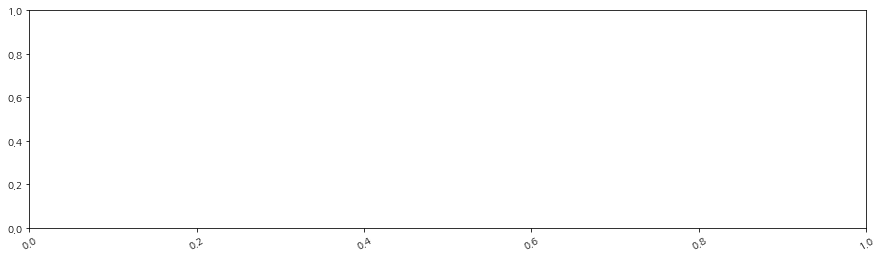

In [12]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=pdf, x="시점", y="국가(대륙)별")